In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map

block_coordinates = [(0,0),(0,1),(1,1),(1,0)]
node_numbers = [100, 100]

space = Mesh(block_coordinates, node_numbers) 

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)
bl = object()
property_map = Map(space)


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-5, itteration_type="nodebynode")

Uinf = np.mean(-solution.velocity[:,:,0])
nu = 1.81e-2
x = np.linspace(0.001,1,(node_numbers[0]))
Re = Uinf*x/nu
delta = 5 * x / np.sqrt(Re)
delta_idx = np.round(delta*len(delta))




Residual:  6999.999999999999 Mass: 8.067990719951013e-13
Solution converged at  1 th iteration


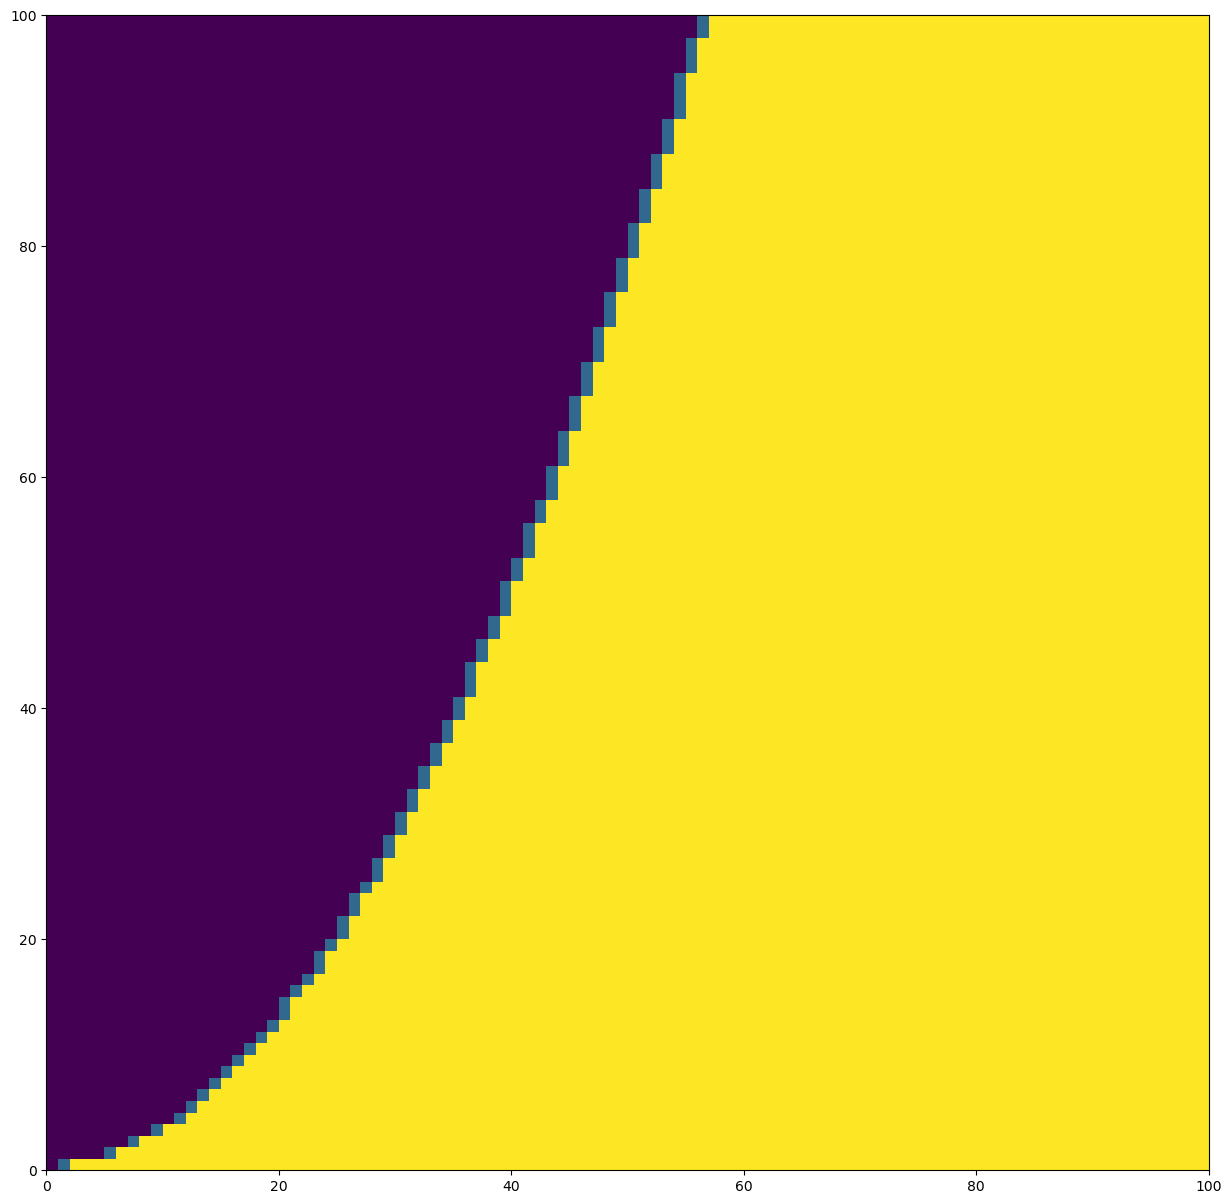

In [2]:
bl = object()
bl.boundary_layer(delta_idx)
property_map.create_object(bl)
property_map.show()